In [10]:
import pandas as pd
import numpy as np

# open df from csv
position_250274 = pd.read_csv('usdc_weth_250274.csv')
position_515539 = pd.read_csv('usdc_weth_515539.csv')
position_520645 = pd.read_csv('usdc_weth_520645.csv')

range = pd.read_csv('usdceth_range_position.csv')
# in range df if upper_price and lower_price are same, set both to NA
range.loc[range['upper_price'] == range['lower_price'], ['upper_price', 'lower_price']] = np.nan

range['daily_LVR_ratio_full'] = (range['log_return'] ** 2) / 8
range['daily_LVR_full_USD'] = range['daily_LVR_ratio_full'] * range['pool_value'] * range['token1_usd'] / 10000
range['cumulative_LVR_ratio_full'] = range['daily_LVR_ratio_full'].cumsum()
range['cumulative_LVR_full_USD'] = range['daily_LVR_full_USD'].cumsum()

In [19]:
position_515539

,open_time,log_return,block,current_tick,upper_price,lower_price,current_price,amount0,amount1,timestamp,date,pool_value,token0_usd,token1_usd,daily_LVR_ratio,in_range,daily_LVR,cumulative_LVR
0,2023-05-30,1.134624,17371593,200744,0.000548,0.000519,0.000522,18402.379463,1.079136,1685447879000,2023-05-30,10.687275,0.999782,1914.26,12.053056,True,0.012881,0.012881
1,2023-05-31,0.953653,17378793,201007,0.000548,0.000519,0.000536,8388.393545,6.376782,1685535323000,2023-05-31,10.873187,1.000000,1865.01,8.479979,True,0.009220,0.022102
2,2023-06-01,1.179973,17385993,201019,0.000548,0.000519,0.000537,7934.615242,6.620166,1685622911000,2023-06-01,10.878440,0.999714,1859.70,12.984029,True,0.014125,0.036226
3,2023-06-02,1.460176,17393193,200881,0.000548,0.000519,0.000529,13169.539240,3.830054,1685710667000,2023-06-02,10.800898,1.001000,1890.15,19.887758,True,0.021481,0.057707
4,2023-06-03,0.797196,17400393,200801,0.000548,0.000519,0.000525,16220.857416,2.221390,1685798147000,2023-06-03,10.738935,0.999679,1903.24,5.938363,True,0.006377,0.064084
5,2023-06-04,1.052769,17407593,200790,0.000548,0.000519,0.000525,16641.368919,2.000702,1685885999000,2023-06-04,10.729450,0.999715,1905.44,10.359719,True,0.011115,0.075200
6,2023-06-05,3.218814,17414793,200983,0.000548,0.000519,0.000535,9296.767319,5.890453,1685973887000,2023-06-05,10.861826,0.999304,1865.79,96.591514,True,0.104916,0.180116
7,2023-06-06,2.690183,17421993,201188,0.000548,0.000519,0.000546,0.000000,0.000000,1686061655000,2023-06-06,0.000000,1.001000,1830.14,67.790831,True,0.000000,0.180116
8,2023-06-07,2.814756,17429193,201134,0.000548,0.000519,0.000543,0.000000,0.000000,1686149399000,2023-06-07,0.000000,0.998195,1844.27,74.065905,True,0.000000,0.180116
9,2023-06-08,1.225996,17436393,201064,0.000548,0.000519,0.000539,0.000000,0.000000,1686237155000,2023-06-08,0.000000,1.001000,1856.72,14.026074,True,0.000000,0.180116


In [11]:
# combine range, position_250274, position_515539, position_520645 on date
df = pd.merge(range, position_250274, on='date', how='left', suffixes=('', '_250274'))
df = pd.merge(df, position_515539, on='date', how='left', suffixes=('', '_515539'))
df = pd.merge(df, position_520645, on='date', how='left', suffixes=('', '_520645'))
combined_df = df

In [28]:
import plotly.graph_objects as go
import plotly.subplots as sp
import pandas as pd
import plotly.offline as pyo

# Convert 'date' column to datetime if it's not already
combined_df['date'] = pd.to_datetime(combined_df['date'])

# Create cumulative columns
combined_df['cumulative_LVR_ratio'] = combined_df['daily_LVR_ratio'].cumsum()
combined_df['cumulative_LVR_366096'] = combined_df['daily_LVR_ratio_515539'].cumsum()
combined_df['cumulative_LVR_453456'] = combined_df['daily_LVR_ratio_520645'].cumsum()

combined_df['daily_LVR_USD'] = combined_df['daily_LVR'] * combined_df['token1_usd']
combined_df['daily_LVR_USD_515539'] = combined_df['daily_LVR_515539'] * combined_df['token1_usd']
combined_df['daily_LVR_USD_520645'] = combined_df['daily_LVR_520645'] * combined_df['token1_usd']

combined_df['cumulative_LVR_USD'] = combined_df['daily_LVR_USD'].cumsum()
combined_df['cumulative_LVR_USD_515539'] = combined_df['daily_LVR_USD_515539'].cumsum()
combined_df['cumulative_LVR_USD_520645'] = combined_df['daily_LVR_USD_520645'].cumsum()

# Create interactive figure with subplots
fig = sp.make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=0.1)

# Add traces for cumulative LVR
fig.add_trace(go.Scatter(x=combined_df['date'], y=combined_df['cumulative_LVR_USD']/(combined_df['pool_value']*combined_df['token1_usd']),mode='lines', name='Range USDC/ETH Active Strategy', line=dict(color='red', width=3)))
fig.add_trace(go.Scatter(x=combined_df['date'], y=combined_df['cumulative_LVR_full_USD']/(combined_df['pool_value']*combined_df['token1_usd']),mode='lines', name='Full Range / V2 Reference Position', line=dict(color='purple')))
fig.add_trace(go.Scatter(x=combined_df['date'], y=combined_df['cumulative_LVR_USD_515539']/(combined_df['pool_value_515539']*combined_df['token1_usd']),mode='lines', name='cumulative_LVR_515539', line=dict(color='orange')))
fig.add_trace(go.Scatter(x=combined_df['date'], y=combined_df['cumulative_LVR_USD_520645']/(combined_df['pool_value_520645']*combined_df['token1_usd']),mode='lines', name='cumulative_LVR_520645', line=dict(color='blue')))

# Add trace for log return on a separate y-axis
fig.add_trace(go.Scatter(x=combined_df['date'], y=combined_df['log_return'],mode='lines', name='Log Return', line=dict(color='black')),row=2, col=1)

# Add traces for current price, upper price, and lower price on a separate y-axis
fig.add_trace(go.Scatter(x=combined_df['date'], y=1/combined_df['current_price'],mode='lines', name='Current Price', line=dict(color='black')),row=3, col=1)
fig.add_trace(go.Scatter(x=combined_df['date'], y=1/combined_df['upper_price'],mode='lines', name='Range Vault Upper Price', line=dict(color='red')),row=3, col=1)
fig.add_trace(go.Scatter(x=combined_df['date'], y=1/combined_df['lower_price'],mode='lines', name='Range Vault Lower Price', line=dict(color='red')),row=3, col=1)

fig.add_trace(go.Scatter(x=combined_df['date'], y=1/combined_df['upper_price_515539'],mode='lines', name='V3 Position 0.3% 515539 Upper Price', line=dict(color='orange')),row=3, col=1)
fig.add_trace(go.Scatter(x=combined_df['date'], y=1/combined_df['lower_price_515539'],mode='lines', name='V3 Position 0.3% 515539 Lower Price', line=dict(color='orange')),row=3, col=1)

fig.add_trace(go.Scatter(x=combined_df['date'], y=1/combined_df['upper_price_520645'],mode='lines', name='V3 Position 0.3% 520645 Upper Price', line=dict(color='blue')),row=3, col=1)
fig.add_trace(go.Scatter(x=combined_df['date'], y=1/combined_df['lower_price_520645'],mode='lines', name='V3 Position 0.3% 520645 Lower Price', line=dict(color='blue')),row=3, col=1)

# Set layout options
fig.update_layout(
    title='Cumulative LVR as % of Pool Value for USDCETH',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Cumulative LVR'),
    yaxis2=dict(title='Volatility %'),
    yaxis3=dict(title='Price'),
    legend=dict(x=1.1, y=1),
    autosize=True,
    margin=dict(l=50, r=50, t=80, b=50),
    hovermode='x unified'
)

# Save the chart as an HTML file
chart_filename = 'USDCETH.html'
pyo.plot(fig, filename=chart_filename, auto_open=False)

# Display the interactive chart
fig.show()


In [26]:


sample_df = combined_df[['date','amount0_515539','amount1_515539','cumulative_LVR_USD_515539','pool_value_515539','upper_price_515539','lower_price_515539']]
sample_df

,date,amount0_515539,amount1_515539,cumulative_LVR_USD_515539,pool_value_515539,upper_price_515539,lower_price_515539
0,2023-05-18,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-05-19,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-05-20,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-05-21,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-05-22,NaN,NaN,NaN,NaN,NaN,NaN
5,2023-05-23,NaN,NaN,NaN,NaN,NaN,NaN
6,2023-05-24,NaN,NaN,NaN,NaN,NaN,NaN
7,2023-05-25,NaN,NaN,NaN,NaN,NaN,NaN
8,2023-05-26,NaN,NaN,NaN,NaN,NaN,NaN
9,2023-05-27,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
import plotly.graph_objects as go
import pandas as pd
import plotly.offline as pyo

# Convert 'date' column to datetime if it's not already
combined_df['date'] = pd.to_datetime(combined_df['date'])

# Create cumulative columns
combined_df['cumulative_LVR'] = combined_df['daily_LVR_ratio'].cumsum()
combined_df['cumulative_LVR_250274'] = combined_df['daily_LVR_ratio_250274'].cumsum()
combined_df['cumulative_LVR_515539'] = combined_df['daily_LVR_ratio_515539'].cumsum()
combined_df['cumulative_LVR_520645'] = combined_df['daily_LVR_ratio_520645'].cumsum()

# Create interactive figure
fig = go.Figure()

# Add traces for each cumulative LVR
fig.add_trace(go.Scatter(x=combined_df['date'], y=combined_df['cumulative_LVR_USD'],
                         mode='lines', name='cumulative_LVR', line=dict(color='red', width=3)))
# fig.add_trace(go.Scatter(x=combined_df['date'], y=combined_df['cumulative_LVR_USD_250274'],
#                          mode='lines', name='cumulative_LVR_250274', line=dict(color='green')))
fig.add_trace(go.Scatter(x=combined_df['date'], y=combined_df['cumulative_LVR_USD_515539'],
                         mode='lines', name='cumulative_LVR_515539', line=dict(color='orange')))
fig.add_trace(go.Scatter(x=combined_df['date'], y=combined_df['cumulative_LVR_USD_520645'],
                         mode='lines', name='cumulative_LVR_520645', line=dict(color='blue')))

# Set layout options
fig.update_layout(
    title='Cumulative LVR in USD for USDCETH',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Cumulative LVR'),
    legend=dict(x=0, y=1),
    autosize=True,
    margin=dict(l=50, r=50, t=80, b=50),
    hovermode='x unified'
)

# Save the chart as an HTML file
chart_filename = 'interactive_chart.html'
pyo.plot(fig, filename=chart_filename, auto_open=False)

fig.show()

In [38]:
import plotly.graph_objects as go
import pandas as pd
import plotly.offline as pyo

# Convert 'date' column to datetime if it's not already
combined_df['date'] = pd.to_datetime(combined_df['date'])

# Create cumulative columns
combined_df['cumulative_LVR_ratio'] = combined_df['daily_LVR_ratio'].cumsum()
combined_df['cumulative_LVR_250274'] = combined_df['daily_LVR_ratio_250274'].cumsum()
combined_df['cumulative_LVR_515539'] = combined_df['daily_LVR_ratio_515539'].cumsum()
combined_df['cumulative_LVR_520645'] = combined_df['daily_LVR_ratio_520645'].cumsum()

# Create interactive figure
fig = go.Figure()

# Add traces for each cumulative LVR
fig.add_trace(go.Scatter(x=combined_df['date'], y=combined_df['cumulative_LVR_ratio'],
                         mode='lines', name='Range USDC/ETH Active Strategy', line=dict(color='red', width=3)))
fig.add_trace(go.Scatter(x=combined_df['date'], y=combined_df['cumulative_LVR_ratio_full'],
                         mode='lines', name='Full Range / V2 Reference Position', line=dict(color='purple')))
# fig.add_trace(go.Scatter(x=combined_df['date'], y=combined_df['cumulative_LVR_250274'],
#                          mode='lines', name='cumulative_LVR_250274', line=dict(color='green')))
fig.add_trace(go.Scatter(x=combined_df['date'], y=combined_df['cumulative_LVR_515539'],
                         mode='lines', name='cumulative_LVR_515539', line=dict(color='orange')))
fig.add_trace(go.Scatter(x=combined_df['date'], y=combined_df['cumulative_LVR_520645'],
                         mode='lines', name='cumulative_LVR_520645', line=dict(color='blue')))

# Set layout options
fig.update_layout(
    title='Cumulative LVR bps for USDCETH',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Cumulative LVR'),
    legend=dict(x=0, y=1),
    autosize=True,
    margin=dict(l=50, r=50, t=80, b=50),
    hovermode='x unified'
)

# Save the chart as an HTML file
chart_filename = 'interactive_chart.html'
pyo.plot(fig, filename=chart_filename, auto_open=False)

fig.show()

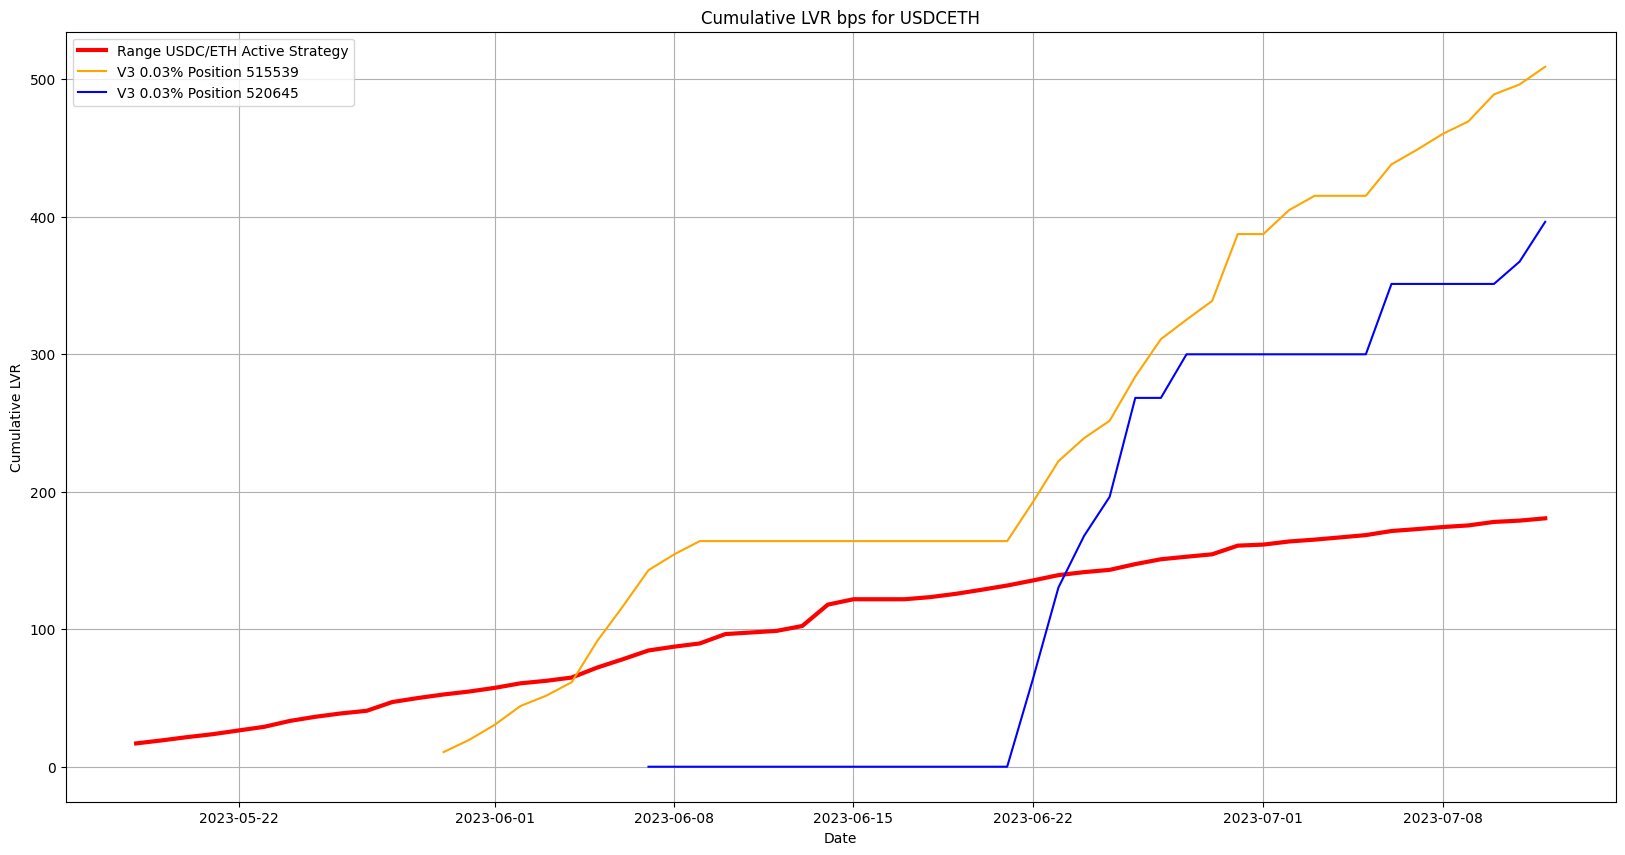

In [30]:
# create new columns for cumulative LVR
combined_df['cumulative_LVR'] = combined_df['daily_LVR_ratio'].cumsum()
combined_df['cumulative_LVR_250274'] = combined_df['daily_LVR_ratio_250274'].cumsum()
combined_df['cumulative_LVR_515539'] = combined_df['daily_LVR_ratio_515539'].cumsum()
combined_df['cumulative_LVR_520645'] = combined_df['daily_LVR_ratio_520645'].cumsum()

# plot date vs cumulative LVR, cumulative LVR_250274, cumulative LVR_515539, cumulative LVR_520645

import matplotlib.pyplot as plt

combined_df['date'] = pd.to_datetime(combined_df['date'])

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(combined_df['date'], combined_df['cumulative_LVR'], label='Range USDC/ETH Active Strategy', color='red', linewidth=3)
ax.plot(combined_df['date'], combined_df['cumulative_LVR_515539'], label='V3 0.03% Position 515539', color='orange')
ax.plot(combined_df['date'], combined_df['cumulative_LVR_520645'], label='V3 0.03% Position 520645', color='blue')
ax.set_xlabel('Date')
ax.grid(True)
ax.set_ylabel('Cumulative LVR')
ax.set_title('Cumulative LVR bps for USDCETH')
ax.legend()

plt.show()

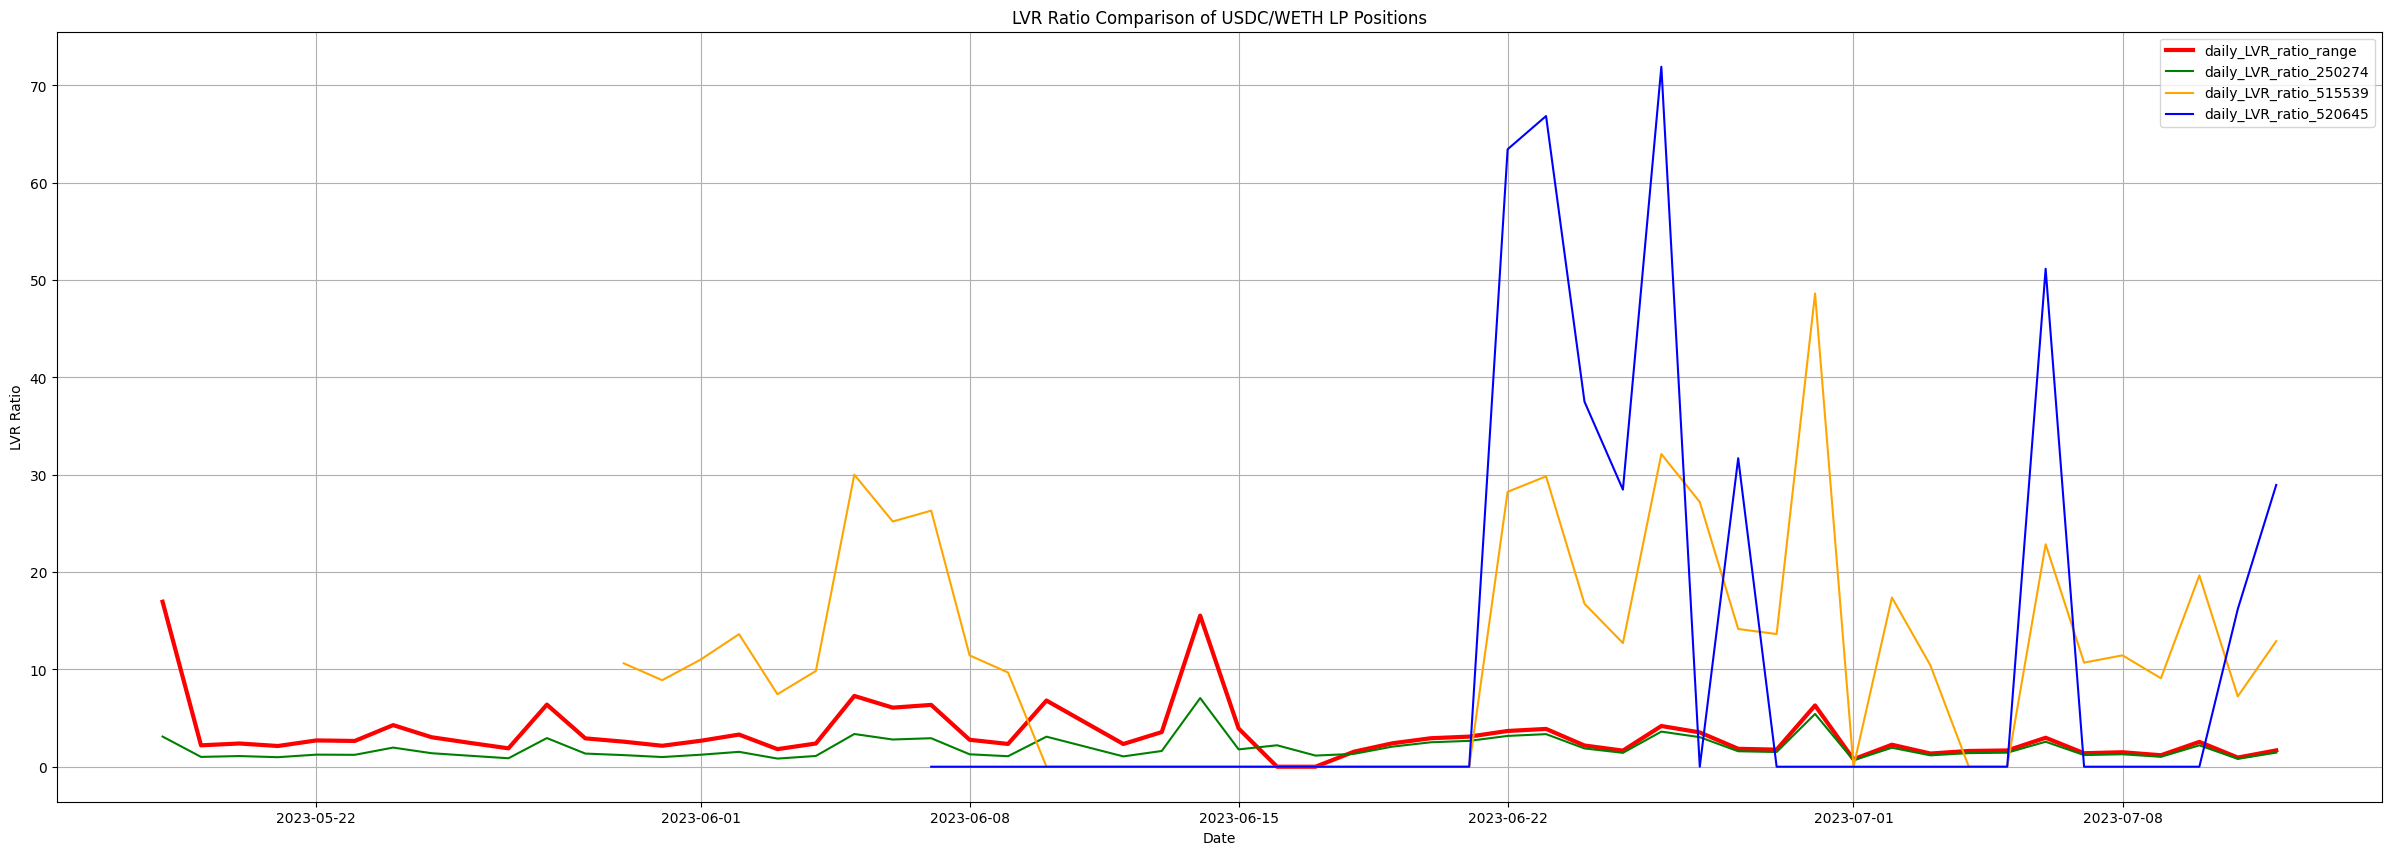

In [31]:
# plot date vs daily_LVR_ratio_range, daily_LVR_ratio_366096, daily_LVR_ratio_453456, daily_LVR_ratio_506262

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(30,10))
combined_df['date'] = pd.to_datetime(combined_df['date'])

ax.plot(combined_df['date'], combined_df['daily_LVR_ratio'], label='daily_LVR_ratio_range', color='red', linewidth=3)
ax.plot(combined_df['date'], combined_df['daily_LVR_ratio_250274'], label='daily_LVR_ratio_250274', color='green')
ax.plot(combined_df['date'], combined_df['daily_LVR_ratio_515539'], label='daily_LVR_ratio_515539', color='orange')
ax.plot(combined_df['date'], combined_df['daily_LVR_ratio_520645'], label='daily_LVR_ratio_520645', color='blue')

ax.set(xlabel='Date', ylabel='LVR Ratio', title='LVR Ratio Comparison of USDC/WETH LP Positions')
ax.grid(True)
ax.legend()

plt.show()

In [26]:
import plotly.graph_objects as go
import pandas as pd

# Convert 'date' column to datetime if it's not already
combined_df['date'] = pd.to_datetime(combined_df['date'])

# Create interactive figure
fig = go.Figure()

# Add traces for each daily LVR ratio
fig.add_trace(go.Scatter(x=combined_df['date'], y=combined_df['daily_LVR_ratio'],
                         mode='lines', name='daily_LVR_bps_range', line=dict(color='red', width=3)))
# fig.add_trace(go.Scatter(x=combined_df['date'], y=combined_df['daily_LVR_ratio_250274'],
#                          mode='lines', name='daily_LVR_ratio_250274', line=dict(color='green')))
fig.add_trace(go.Scatter(x=combined_df['date'], y=combined_df['daily_LVR_ratio_515539'],
                         mode='lines', name='daily_LVR_bps_515539', line=dict(color='orange')))
fig.add_trace(go.Scatter(x=combined_df['date'], y=combined_df['daily_LVR_ratio_520645'],
                         mode='lines', name='daily_LVR_bps_520645', line=dict(color='blue')))

# Set layout options
fig.update_layout(
    title='LVR Bps Comparison of USDC/WETH LP Positions',
    xaxis=dict(title='Date'),
    yaxis=dict(title='LVR Ratio'),
    legend=dict(x=0, y=1),
    autosize=True,
    margin=dict(l=50, r=50, t=80, b=50),
    hovermode='x unified'
)

# Save the chart as an HTML file
chart_filename = 'interactive_chart.html'
pyo.plot(fig, filename=chart_filename, auto_open=False)

# Display the interactive chart
fig.show()


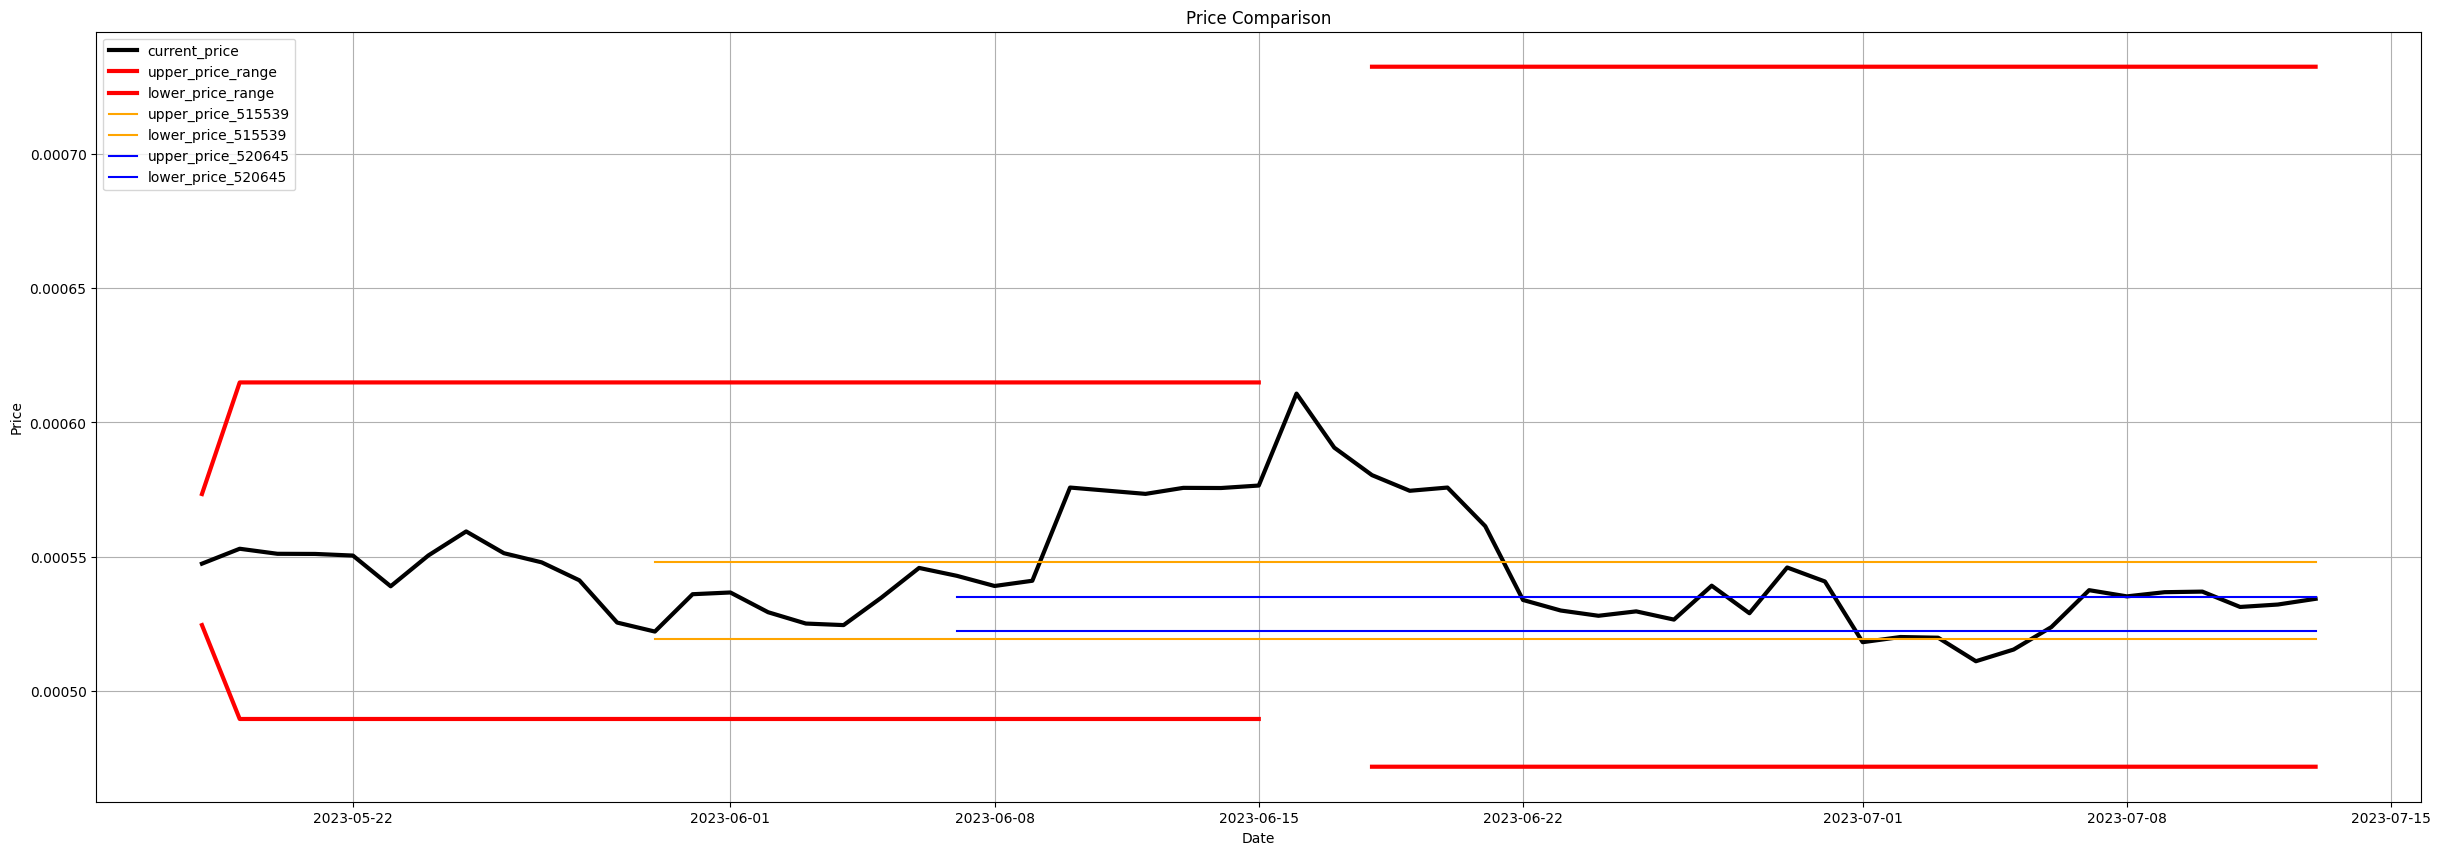

In [27]:
fig, ax = plt.subplots(figsize=(30,10))
combined_df['date'] = pd.to_datetime(combined_df['date'])

ax.plot(combined_df['date'], combined_df['current_price'], label='current_price',color='black', linewidth=3)
ax.plot(combined_df['date'], combined_df['upper_price'], label='upper_price_range',color='red', linewidth=3)
ax.plot(combined_df['date'], combined_df['lower_price'], label='lower_price_range',color='red', linewidth=3)
# ax.plot(combined_df['date'], combined_df['upper_price_250274'], label='upper_price_250274',color='green', linewidth=2)
# ax.plot(combined_df['date'], combined_df['lower_price_250274'], label='lower_price_250274',color='green', linewidth=2)
ax.plot(combined_df['date'], combined_df['upper_price_515539'], label='upper_price_515539',color='orange')
ax.plot(combined_df['date'], combined_df['lower_price_515539'], label='lower_price_515539',color='orange')
ax.plot(combined_df['date'], combined_df['upper_price_520645'], label='upper_price_520645',color='blue')
ax.plot(combined_df['date'], combined_df['lower_price_520645'], label='lower_price_520645',color='blue')

ax.set(xlabel='Date', ylabel='Price', title='Price Comparison')
ax.grid(True)
ax.legend()

plt.show()